In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
a = np.mean([6.5652e-05, 5.914e-05, 7.4078e-05])
b = np.mean([0.000640744, 0.000642708,0.000889458] )
c = np.mean([0.00636916, 0.0063444, 0.00627399] )
d = np.mean([0.0667373, 0.07126, 0.069452])
e = np.mean([0.911591, 0.927136, 0.919825])
f = np.mean([11.1932, 12.2605, 11.2606])


aa = np.mean([4.3992e-05, 4.6487e-05, 4.6757e-05])
bb = np.mean([0.000382383, 0.000425633, 0.000422918])
cc = np.mean([0.00452039, 0.00402952, 0.00405893])
dd =np.mean([0.0500182, 0.0436485, 0.0434704])
ee = np.mean([0.470753, 0.541561, 0.539659])
ff = np.mean([5.30346, 5.55552,  5.25281])

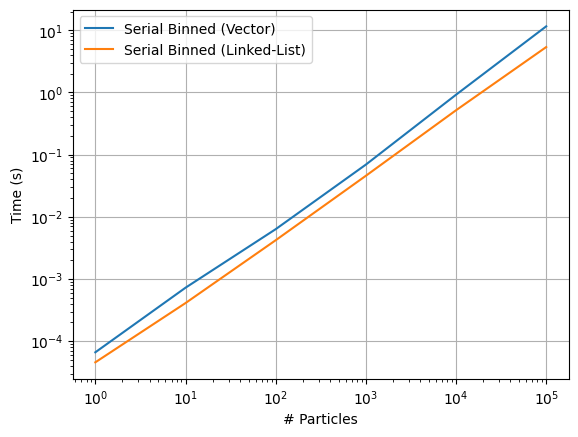

In [4]:
plt.plot([1, 10, 100, 1000, 10000, 100000], [a,b,c,d,e,f], label = "Serial Binned (Vector)")
plt.plot([1, 10, 100, 1000, 10000, 100000], [aa,bb,cc,dd,ee,ff], label = "Serial Binned (Linked-List)")
plt.yscale('log')
plt.xscale('log')
plt.grid()

plt.xlabel("# Particles")
plt.ylabel("Time (s)")
plt.legend()

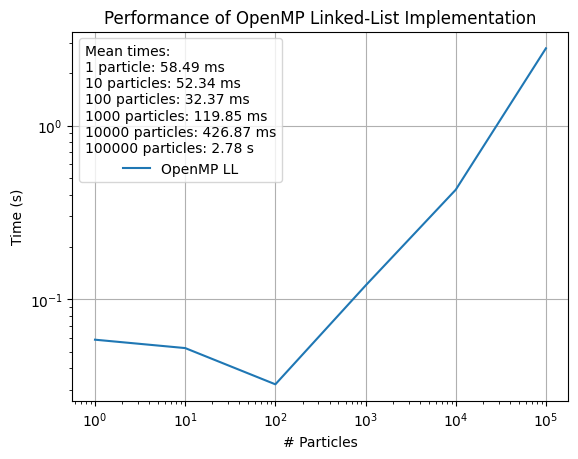

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Updated mean values from the test runs
a = np.mean([0.0270747, 0.0901056, 0.0582839])
b = np.mean([0.028183, 0.0297709, 0.0990513])
c = np.mean([0.0324352, 0.0317266, 0.0329476])
d = np.mean([0.148165, 0.0645422, 0.146856])
e = np.mean([0.480396, 0.387831, 0.412389])
f = np.mean([3.48648, 2.38634, 2.47389])

# Convert times to ms or s where appropriate
def format_time(time):
    if time < 1e-6:
        return f"{time * 1e9:.2f} ns"
    elif time < 1e-3:
        return f"{time * 1e6:.2f} µs"
    elif time < 1:
        return f"{time * 1e3:.2f} ms"
    else:
        return f"{time:.2f} s"

# Plotting the data
plt.plot([1, 10, 100, 1000, 10000, 100000], [a,b,c,d,e,f], label = "OpenMP LL")
plt.yscale('log')
plt.xscale('log')
plt.grid()

plt.xlabel("# Particles")
plt.ylabel("Time (s)")
plt.legend()

plt.title("Performance of OpenMP Linked-List Implementation")
#plt.legend(title=f"Mean times:\n1 particle: {a:.6f}s\n10 particles: {b:.6f}s\n100 particles: {c:.6f}s\n1000 particles: {d:.6f}s\n10000 particles: {e:.6f}s\n100000 particles: {f:.6f}s", loc="upper left")

plt.legend(title="Mean times:\n"
                f"1 particle: {format_time(a)}\n"
                f"10 particles: {format_time(b)}\n"
                f"100 particles: {format_time(c)}\n"
                f"1000 particles: {format_time(d)}\n"
                f"10000 particles: {format_time(e)}\n"
                f"100000 particles: {format_time(f)}", loc="upper left")

plt.show()


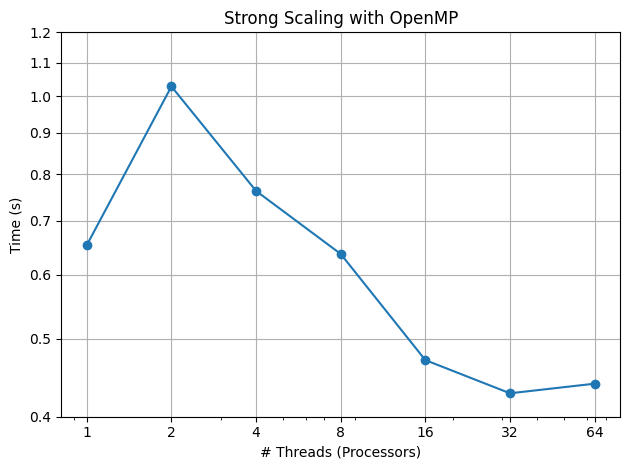

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Updated simulation times from your runs (average times from 3 iterations)
time_1 = np.mean([0.654711, 0.649893, 0.654993])   # Time with 1 processor
time_2 = np.mean([1.05572, 0.957935, 1.07047])    # Time with 2 processors
time_4 = np.mean([0.978716, 0.639204, 0.669996])  # Time with 4 processors
time_8 = np.mean([0.756949, 0.821156, 0.332753])  # Time with 8 processors
time_16 = np.mean([0.479105, 0.458692, 0.472991]) # Time with 16 processors
time_32 = np.mean([0.479157, 0.38327, 0.420697])  # Time with 32 processors
time_64 = np.mean([0.456783, 0.396151, 0.465883]) # Time with 64 processors

# Expected time for strong scaling (ideal case) would be original time divided by the number of processors
# SSE = (Time with 1 processor / Time with N processors) / N

# Calculate strong scaling efficiency for each case
sse_2 = (time_1 / time_2) / 2
sse_4 = (time_1 / time_4) / 4
sse_8 = (time_1 / time_8) / 8
sse_16 = (time_1 / time_16) / 16
sse_32 = (time_1 / time_32) / 32
sse_64 = (time_1 / time_64) / 64

# Function to format time in ns/ms/s
def format_time(time_in_seconds):
    if time_in_seconds < 1e-6:
        return f"{time_in_seconds * 1e9:.2f} ns"
    elif time_in_seconds < 1e-3:
        return f"{time_in_seconds * 1e6:.2f} µs"
    elif time_in_seconds < 1:
        return f"{time_in_seconds * 1e3:.2f} ms"
    else:
        return f"{time_in_seconds:.2f} s"

# Plotting the data
plt.plot([1, 2, 4, 8, 16, 32, 64], [time_1, time_2, time_4, time_8, time_16, time_32, time_64], label="Strong Scaling - OpenMP", marker='o')
plt.yscale('log')
plt.xscale('log')
plt.grid()

# Adjusting tick labels for better representation
plt.xticks([1, 2, 4, 8, 16, 32, 64], ["1", "2", "4", "8", "16", "32", "64"])
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2], ["0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0", "1.1", "1.2"])

# Adding the legend with simulation times and scaling efficiency, moving it outside the plot
'''plt.legend(title="Mean times and Efficiency:\n"
                f"1 thread: {format_time(time_1)}\n"
                f"2 threads: {format_time(time_2)} (SSE: {sse_2 * 100:.1f}%)\n"
                f"4 threads: {format_time(time_4)} (SSE: {sse_4 * 100:.1f}%)\n"
                f"8 threads: {format_time(time_8)} (SSE: {sse_8 * 100:.1f}%)\n"
                f"16 threads: {format_time(time_16)} (SSE: {sse_16 * 100:.1f}%)\n"
                f"32 threads: {format_time(time_32)} (SSE: {sse_32 * 100:.1f}%)\n"
                f"64 threads: {format_time(time_64)} (SSE: {sse_64 * 100:.1f}%)",
                loc="center left", bbox_to_anchor=(1, 0.5))
'''
# Adding labels and title
plt.xlabel("# Threads (Processors)")
plt.ylabel("Time (s)")
plt.title("Strong Scaling with OpenMP")

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()




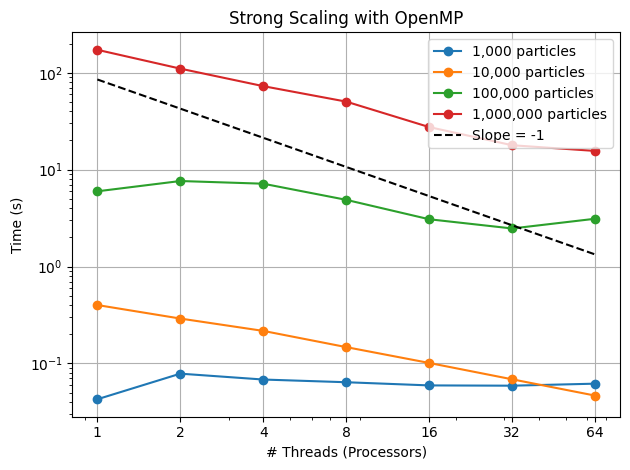

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Updated simulation times from your runs (average times from 3 iterations)
time_1_1000 = np.mean([0.0428369, 0.0425822, 0.0424913])   # Time with 1 processor for 1000 particles
time_2_1000 = np.mean([0.0783941, 0.0782472, 0.0783935])    # Time with 2 processors for 1000 particles
time_4_1000 = np.mean([0.0613929, 0.0617131, 0.0812671])    # Time with 4 processors for 1000 particles
time_8_1000 = np.mean([0.0639021, 0.0638147, 0.0639725])    # Time with 8 processors for 1000 particles
time_16_1000 = np.mean([0.0598371, 0.058999, 0.0589109])    # Time with 16 processors for 1000 particles
time_32_1000 = np.mean([0.0585914, 0.0596266, 0.0583474])   # Time with 32 processors for 1000 particles
time_64_1000 = np.mean([0.0617551, 0.0615569, 0.061952])    # Time with 64 processors for 1000 particles

time_1_10000 = np.mean([0.400126, 0.402303, 0.398249])   # Time with 1 processor for 10000 particles
time_2_10000 = np.mean([0.290375, 0.292485, 0.287932])   # Time with 2 processors for 10000 particles
time_4_10000 = np.mean([0.217264, 0.220463, 0.211648])   # Time with 4 processors for 10000 particles
time_8_10000 = np.mean([0.145922, 0.148925, 0.146836])   # Time with 8 processors for 10000 particles
time_16_10000 = np.mean([0.0995762, 0.102613, 0.100854]) # Time with 16 processors for 10000 particles
time_32_10000 = np.mean([0.0675969, 0.0697242, 0.068168])# Time with 32 processors for 10000 particles
time_64_10000 = np.mean([0.0463768, 0.0472823, 0.0458344])# Time with 64 processors for 10000 particles

time_1_100000 = np.mean([5.97768, 5.95447, 5.99574])   # Time with 1 processor for 100000 particles
time_2_100000 = np.mean([7.60606, 7.67479, 7.61576])    # Time with 2 processors for 100000 particles
time_4_100000 = np.mean([7.0134, 7.57519, 6.88921])     # Time with 4 processors for 100000 particles
time_8_100000 = np.mean([4.91209, 4.92938, 4.7959])     # Time with 8 processors for 100000 particles
time_16_100000 = np.mean([3.01906, 3.17474, 3.03304])   # Time with 16 processors for 100000 particles
time_32_100000 = np.mean([2.25676, 2.66646, 2.48806])   # Time with 32 processors for 100000 particles
time_64_100000 = np.mean([2.86345, 3.25179, 3.22266])   # Time with 64 processors for 100000 particles

time_1_1000000 = np.mean([172.658])   # Time with 1 processor for 1000000 particles
time_2_1000000 = np.mean([110.351])   # Time with 2 processors for 1000000 particles
time_4_1000000 = np.mean([72.7786])   # Time with 4 processors for 1000000 particles
time_8_1000000 = np.mean([50.3772])   # Time with 8 processors for 1000000 particles
time_16_1000000 = np.mean([27.5071])  # Time with 16 processors for 1000000 particles
time_32_1000000 = np.mean([17.8696])  # Time with 32 processors for 1000000 particles
time_64_1000000 = np.mean([15.6025])  # Time with 64 processors for 1000000 particles

# Define the constant C for slope = -1 (using time_1_1000 as the reference)
C = time_1_1000
# Modify the constant for "raising" the line (scale factor can be adjusted)
scale_factor = 20e2

# Generate the values for the line with slope = -1: y = C * x^-1
slope_line = [C * scale_factor * (x / 1) ** -1 for x in [1, 2, 4, 8, 16, 32, 64]]

# Function to format time in ns/ms/s
def format_time(time_in_seconds):
    if time_in_seconds < 1e-6:
        return f"{time_in_seconds * 1e9:.2f} ns"
    elif time_in_seconds < 1e-3:
        return f"{time_in_seconds * 1e6:.2f} µs"
    elif time_in_seconds < 1:
        return f"{time_in_seconds * 1e3:.2f} ms"
    else:
        return f"{time_in_seconds:.2f} s"

# Plotting the data
plt.plot([1, 2, 4, 8, 16, 32, 64], [time_1_1000, time_2_1000, time_4_1000, time_8_1000, time_16_1000, time_32_1000, time_64_1000], label="1,000 particles", marker='o')
plt.plot([1, 2, 4, 8, 16, 32, 64], [time_1_10000, time_2_10000, time_4_10000, time_8_10000, time_16_10000, time_32_10000, time_64_10000], label="10,000 particles", marker='o')
plt.plot([1, 2, 4, 8, 16, 32, 64], [time_1_100000, time_2_100000, time_4_100000, time_8_100000, time_16_100000, time_32_100000, time_64_100000], label="100,000 particles", marker='o')
plt.plot([1, 2, 4, 8, 16, 32, 64], [time_1_1000000, time_2_1000000, time_4_1000000, time_8_1000000, time_16_1000000, time_32_1000000, time_64_1000000], label="1,000,000 particles", marker='o')

# Plot the slope line
plt.plot([1, 2, 4, 8, 16, 32, 64], slope_line, label="Slope = -1", linestyle='--', color='black')

plt.yscale('log')
plt.xscale('log')
plt.grid()

# Adjusting tick labels for better representation
plt.xticks([1, 2, 4, 8, 16, 32, 64], ["1", "2", "4", "8", "16", "32", "64"])

# Adding labels and title
plt.xlabel("# Threads (Processors)")
plt.ylabel("Time (s)")
plt.title("Strong Scaling with OpenMP")

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.legend()
plt.show()


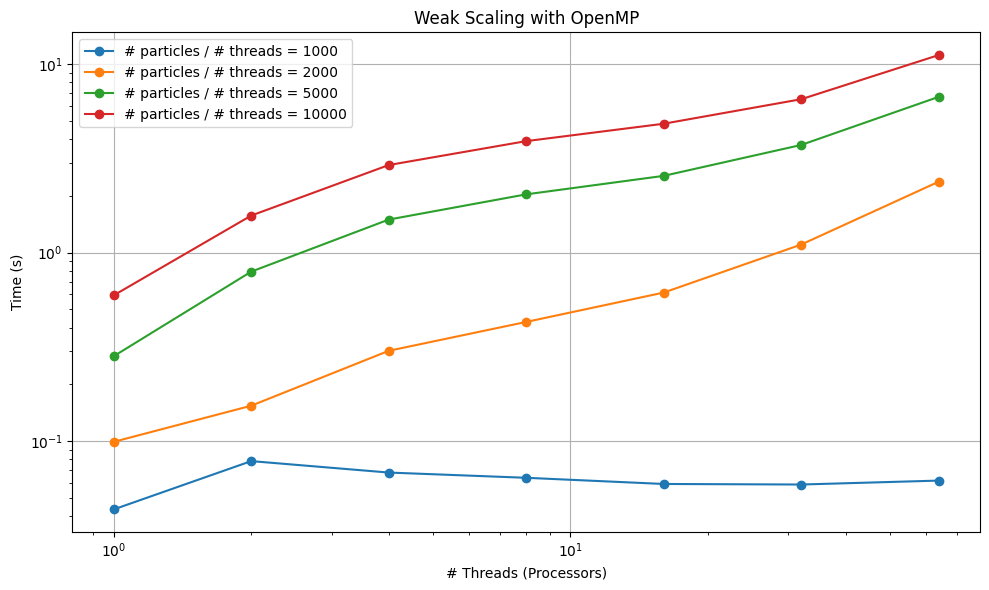

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Weak scaling data based on your runs
time_1_1000 = 0.0434266   # Time with 1 processor for 1000 particles
time_2_2000 = 0.154158    # Time with 2 processors for 2000 particles
time_4_4000 = 0.301488    # Time with 4 processors for 4000 particles
time_8_8000 = 0.429015    # Time with 8 processors for 8000 particles
time_16_16000 = 0.614211  # Time with 16 processors for 16000 particles
time_32_32000 = 1.10432   # Time with 32 processors for 32000 particles
time_64_64000 = 2.38019   # Time with 64 processors for 64000 particles

time_1_2000 = 0.0991436   # Time with 1 processor for 2000 particles
time_2_4000 = 0.331365    # Time with 2 processors for 4000 particles
time_4_8000 = 0.602136    # Time with 4 processors for 8000 particles
time_8_16000 = 0.848605   # Time with 8 processors for 16000 particles
time_16_32000 = 1.18069   # Time with 16 processors for 32000 particles
time_32_64000 = 1.84149   # Time with 32 processors for 64000 particles
time_64_128000 = 2.9867   # Time with 64 processors for 128000 particles

time_1_5000 = 0.282176    # Time with 1 processor for 5000 particles
time_2_10000 = 0.793065   # Time with 2 processors for 10000 particles
time_4_20000 = 1.49817    # Time with 4 processors for 20000 particles
time_8_40000 = 2.03917    # Time with 8 processors for 40000 particles
time_16_80000 = 2.5561    # Time with 16 processors for 80000 particles
time_32_160000 = 3.72864  # Time with 32 processors for 160000 particles
time_64_320000 = 6.71017  # Time with 64 processors for 320000 particles

time_1_10000 = 0.593655   # Time with 1 processor for 10000 particles
time_2_20000 = 1.57317    # Time with 2 processors for 20000 particles
time_4_40000 = 2.91678    # Time with 4 processors for 40000 particles
time_8_80000 = 3.90697    # Time with 8 processors for 80000 particles
time_16_160000 = 4.83159  # Time with 16 processors for 160000 particles
time_32_320000 = 6.51928  # Time with 32 processors for 320000 particles
time_64_640000 = 11.1817  # Time with 64 processors for 640000 particles

# Weak scaling: Time for each set of particles per number of threads
particles_per_thread = [1000, 2000, 5000, 10000]
threads = [1, 2, 4, 8, 16, 32, 64]

# We will use these lists for plotting
weak_scaling_times = [
    [time_1_1000, time_2_1000, time_4_1000, time_8_1000, time_16_1000, time_32_1000, time_64_1000],
    [time_1_2000, time_2_2000, time_4_4000, time_8_8000, time_16_16000, time_32_32000, time_64_64000],
    [time_1_5000, time_2_10000, time_4_20000, time_8_40000, time_16_80000, time_32_160000, time_64_320000],
    [time_1_10000, time_2_20000, time_4_40000, time_8_80000, time_16_160000, time_32_320000, time_64_640000]
]

# Plotting the weak scaling results
plt.figure(figsize=(10, 6))
for idx, time_data in enumerate(weak_scaling_times):
    plt.plot(threads, time_data, label=f"# particles / # threads = {particles_per_thread[idx]}", marker='o')

# Adding labels and title
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlabel("# Threads (Processors)")
plt.ylabel("Time (s)")
plt.title("Weak Scaling with OpenMP")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
